In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [38]:
df = pd.read_csv('/content/car_purchasing.csv',encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [40]:
df.isnull().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


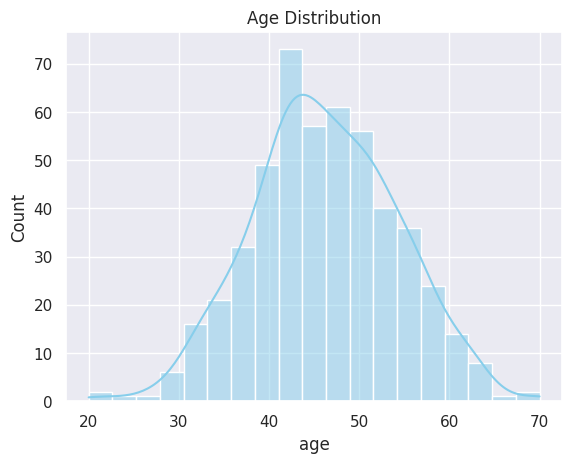

In [41]:
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

In [42]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


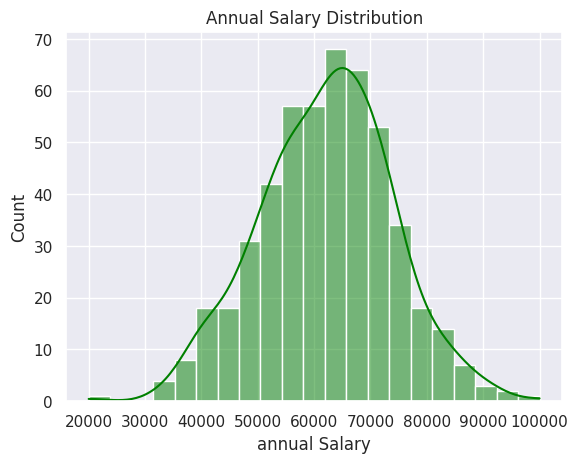

In [43]:
sns.histplot(df['annual Salary'], kde=True, color='green')
plt.title('Annual Salary Distribution')
plt.show()

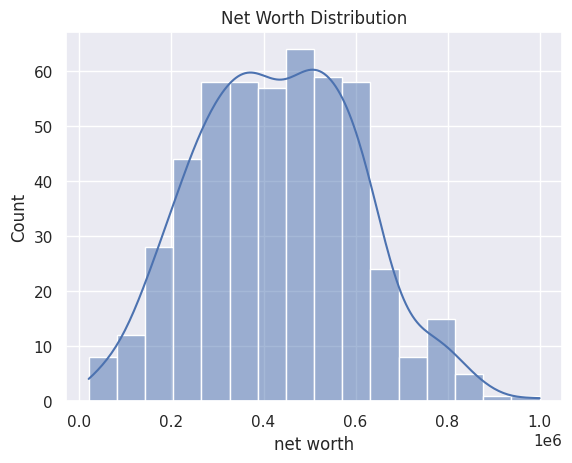

In [44]:
sns.histplot(df['net worth'], kde=True)
plt.title('Net Worth Distribution')
plt.show()

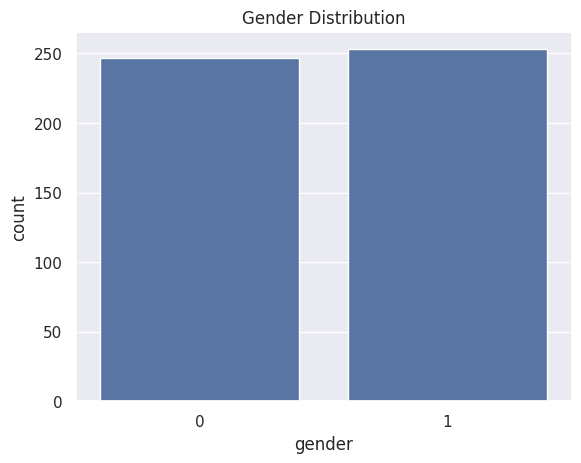

In [45]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [46]:
df.drop(columns=['customer name','customer e-mail','country','gender','credit card debt'],inplace=True)
df

,age,annual Salary,net worth,car purchase amount
0,41.851720,62812.09301,238961.2505,35321.45877
1,40.870623,66646.89292,530973.9078,45115.52566
2,43.152897,53798.55112,638467.1773,42925.70921
3,58.271369,79370.03798,548599.0524,67422.36313
4,57.313749,59729.15130,560304.0671,55915.46248
...,...,...,...,...
495,41.462515,71942.40291,541670.1016,48901.44342
496,37.642000,56039.49793,360419.0988,31491.41457
497,53.943497,68888.77805,764531.3203,64147.28888
498,59.160509,49811.99062,337826.6382,45442.15353


In [47]:
X =df.drop(columns=['car purchase amount'])
y=df['car purchase amount']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.55074911,  0.05857619, -1.11046945],
       [-0.67383422,  0.38657041,  0.57392937],
       [-0.38750768, -0.71236095,  1.19397625],
       ...,
       [ 0.96624515,  0.57832106,  1.92114437],
       [ 1.62075409, -1.05333541, -0.54019026],
       [ 0.06140832, -0.06470949,  0.18153098]])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state =42)

In [50]:
print(f"x_train.shape: {X_train.shape}")
print(f"x_test.shape: {X_test.shape}")
print("_____________\n")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

x_train.shape: (400, 3)
x_test.shape: (100, 3)
_____________

y_train.shape: (400,)
y_test.shape: (100,)


In [51]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred=reg.predict(X_test)

In [53]:
print(f"reg.score for test: {reg.score(X_test,y_test)*100}")
print(f"reg.score for train: {reg.score(X_train,y_train)*100}")

reg.score for test: 99.9999981027311
reg.score for train: 99.99999811846746
